In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [9]:
f = open('/kaggle/input/iris/Iris.csv')
data = pd.read_csv(f)
f.close()
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [10]:
setosa = data.loc[data['Species'] == 'Iris-setosa']
versicolor = data.loc[data['Species'] == 'Iris-versicolor']
virginica = data.loc[data['Species'] == 'Iris-virginica']

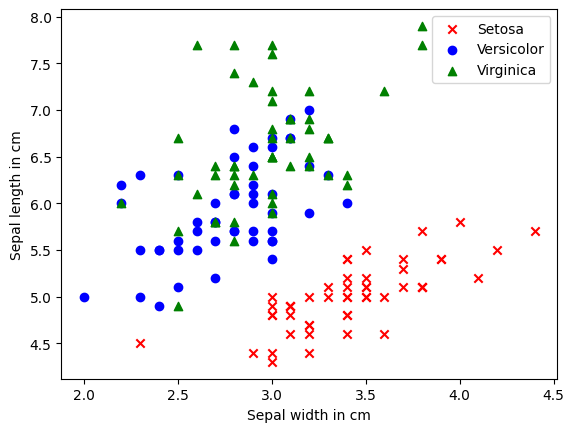

In [11]:
import matplotlib.pyplot as plt
plt.scatter(setosa['SepalWidthCm'], setosa['SepalLengthCm'], c = 'r', marker = 'x', label = 'Setosa')
plt.scatter(versicolor['SepalWidthCm'], versicolor['SepalLengthCm'], c = 'b', marker = 'o', label = 'Versicolor')
plt.scatter(virginica['SepalWidthCm'], virginica['SepalLengthCm'], c = 'g', marker = '^', label = 'Virginica')
plt.xlabel('Sepal width in cm')
plt.ylabel('Sepal length in cm')
plt.legend()
plt.show()

Thus a graph of sepal length vs sepal width can allow us to tell apart Iris setosa from the other two species.

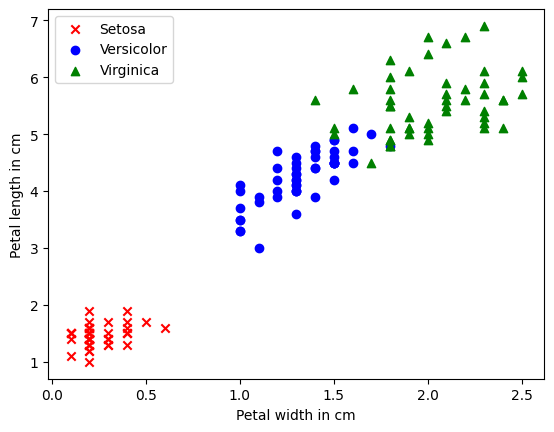

In [12]:
plt.scatter(setosa['PetalWidthCm'], setosa['PetalLengthCm'], c = 'r', marker = 'x', label = 'Setosa')
plt.scatter(versicolor['PetalWidthCm'], versicolor['PetalLengthCm'], c = 'b', marker = 'o', label = 'Versicolor')
plt.scatter(virginica['PetalWidthCm'], virginica['PetalLengthCm'], c = 'g', marker = '^', label = 'Virginica')
plt.xlabel('Petal width in cm')
plt.ylabel('Petal length in cm')
plt.legend()
plt.show()

And a plot of petal length vs petal width can allow us to differentiate Iris versicolor and Iris virginica.

In [13]:
#Splitting the data into training and testing sets (80-20)
data_ = data.sample(frac=1).reset_index(drop=True)
train_data = data_[:120]
test_data = data_[120:]

In [71]:
#logistic regression to differentiate between setosa and non-setosa
#features: sepal length and sepal width

m = train_data.shape[0]#120
y_train = np.zeros(m)
for i in range(m):
    if train_data.at[i, 'Species'] == 'Iris-setosa':
        y_train[i] = 1
        
X_train = np.array(train_data[['SepalWidthCm', 'SepalLengthCm']])

def sigmoid(z):
    return 1/(1+np.exp(-z))

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    n = X.shape[1]
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        err = sigmoid(np.dot(w, X[i])+b) - y[i]
        dj_dw += err*X[i]
        dj_db += err
    return dj_dw/m, dj_db/m

import copy

def gradient_descent(X, y, w_in, b_in, alpha, num_iters, gradient_function):
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)
        w -= alpha*dj_dw
        b -= alpha*dj_db
    return w, b

n = X_train.shape[1]
w_init = np.zeros(n)
b_init = 0
tmp_alpha = 10
iterations = 20000
w_final, b_final = gradient_descent(X_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_gradient)
print(w_final, b_final, sep = '\n')

[ 18.72185676 -20.72360734]
52.735860646095965


In [72]:
def predict(w, x, b):
    g = sigmoid(np.dot(w, x)+b)
    if g >= 0.5:
        return 1
    else:
        return 0
    
correct = 0
for i in range(m):
    if predict(w_final, X_train[i], b_final) == y_train[i]:
        correct += 1
print(100*correct/m)

100.0


In [73]:
#run on test data
X_test = np.array(test_data[['SepalWidthCm', 'SepalLengthCm']])
M = test_data.shape[0]
y_test = np.zeros(M)
for i in range(M):
    if test_data.at[i+m, 'Species'] == 'Iris-setosa':
        y_test[i] = 1

correct = 0
for i in range(M):
    if predict(w_final, X_test[i], b_final) == y_test[i]:
        correct += 1
print(100*correct/M)

100.0


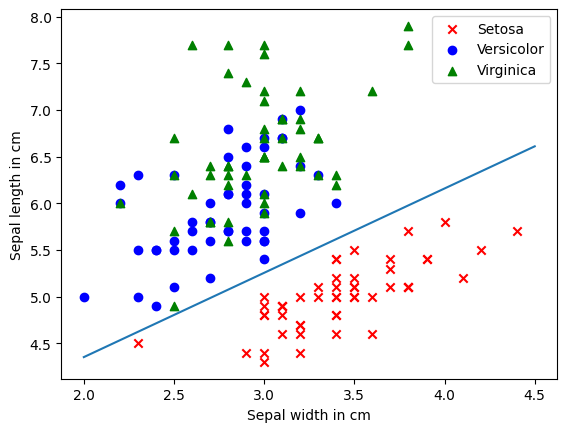

In [75]:
#plot the line separating setosa and non-setosa on sepal length vs width plot
#ie sigmoid(w1x1+w2x2+b) >= 0.5 ie the line w1x1+w2x2+b >= 0
#x1:sepal width, x2: length
plt.scatter(setosa['SepalWidthCm'], setosa['SepalLengthCm'], c = 'r', marker = 'x', label = 'Setosa')
plt.scatter(versicolor['SepalWidthCm'], versicolor['SepalLengthCm'], c = 'b', marker = 'o', label = 'Versicolor')
plt.scatter(virginica['SepalWidthCm'], virginica['SepalLengthCm'], c = 'g', marker = '^', label = 'Virginica')
plt.plot([2, 4.5], [-(b_final+w_final[0]*2)/w_final[1],-(b_final+w_final[0]*4.5)/w_final[1]])
plt.xlabel('Sepal width in cm')
plt.ylabel('Sepal length in cm')
plt.legend()
plt.show()

In [93]:
#logistic regression to differentiate between virginica and versicolor (non-virginica)
#features: petal length and petal width\
X_train = np.array(train_data[['PetalWidthCm', 'PetalLengthCm']])
y_train = np.zeros(m)
for i in range(m):
    if train_data.at[i, 'Species'] == 'Iris-virginica':
        y_train[i] = 1
w_init = np.zeros(n)
b_init = 0
tmp_alpha = 10
iterations = 20000
w_final, b_final = gradient_descent(X_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_gradient)
print(w_final, b_final)


[24.05538094 15.32786366] -117.95529804990282


In [94]:
correct = 0
for i in range(m):
    if predict(w_final, X_train[i], b_final) == y_train[i]:
        correct += 1
print(100*correct/m)

96.66666666666667


In [95]:
#run on test data
X_test = np.array(test_data[['PetalWidthCm', 'PetalLengthCm']])
y_test = np.zeros(M)
for i in range(M):
    if test_data.at[i+m, 'Species'] == 'Iris-virginica':
        y_test[i] = 1
correct = 0
for i in range(M):
    if predict(w_final, X_test[i], b_final) == y_test[i]:
        correct += 1
print(100*correct/M)

96.66666666666667


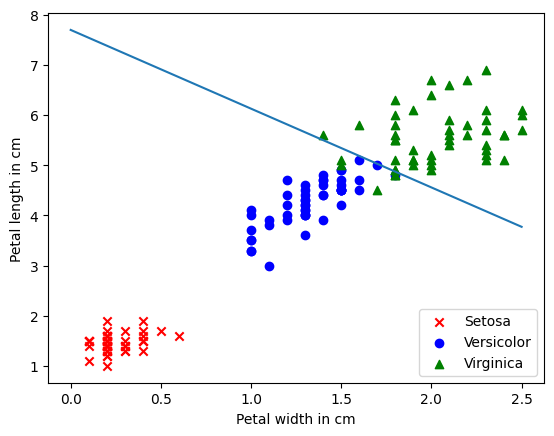

In [96]:
#plot the line separating virginica and non-virginica on petal length vs width plot
#ie sigmoid(w1x1+w2x2+b) >= 0.5 ie the line w1x1+w2x2+b >= 0
#x1:petal width, x2: length
plt.scatter(setosa['PetalWidthCm'], setosa['PetalLengthCm'], c = 'r', marker = 'x', label = 'Setosa')
plt.scatter(versicolor['PetalWidthCm'], versicolor['PetalLengthCm'], c = 'b', marker = 'o', label = 'Versicolor')
plt.scatter(virginica['PetalWidthCm'], virginica['PetalLengthCm'], c = 'g', marker = '^', label = 'Virginica')
plt.plot([0, 2.5], [-(b_final+w_final[0]*0)/w_final[1],-(b_final+w_final[0]*2.5)/w_final[1]])
plt.xlabel('Petal width in cm')
plt.ylabel('Petal length in cm')
plt.legend()
plt.show()

Thus, using the first regression we can classify Iris setosa, and using the second we can classify Iris virginica, and if it is neither, the given specimen is Iris versicolor.